## Lifestyle and sleep disorders  

### 1. Problem definition: 
#### Given the metrics about the lifestyle of people, can we predict the presence of any sleep disorders? 

### 2. About the data:
* The data is taken from Kaggle: [https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset)
* The dataset comprises about 400 rows (374 to be exact) with different features about the lifestyle of the people being addressed.
* The data dictionary is presented below: 

| Metric | Numerical/Categorical (N/C) | Description | Units (if any) | 
| --- | --- | --- | --- | 
| Person ID | N | An identifier for each individual. |  |
| Gender | C | Male/Female |  |
| Age | N |  |  |
| Occupation | C | Occupation or profession of the person |  |
| Sleep Duration | N | hours/day | hours |
| Quality of Sleep | C | A subjective rating of the quality of sleep from 1-10 |  |
| Physical Activity Level | N | Number of minutes the person engages in physical activity daily | min/day | 
| Stress Level | N | A subjective rating of the stress level experienced by the person, ranging from 1 to 10. |  |
| BMI Category | C |  |  |
| Blood Pressure | N | systolic/diastolic: The BP measurement of the person, indicated as systolic pressure over diastolic pressure. | mmHg | 
| Heart Rate | N | The resting heart rate of the person in beats per minute. | bpm |
| Daily Steps | N | The number of steps the person takes per day. |  |
| Sleep Disorder | C | The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea) |  |

* A little about the sleep disorders mentioned in the last column. 
    * None: The individual does not exhibit any specific sleep disorder.
    * Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
    * Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.

* Also, the data is synthetic.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [8]:
sleep_data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
sleep_data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [39]:
sleep_data['Gender'].value_counts()

Gender
Male      189
Female    185
Name: count, dtype: int64

#### Any missing data?

In [7]:
sleep_data.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

Let us assume the people don't have any sleep disorder whose information is missing.

In [189]:
sleep_data['Sleep Disorder'] = sleep_data['Sleep Disorder'].fillna('No disorder')
sleep_data.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [9]:
sleep_data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [10]:
sleep_data['BMI Category'].value_counts()

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

Since there are two categories with same name: 'Normal' and 'Normal Weight', let's correct them so that both represent the same category.

In [190]:
sleep_data['BMI Category'] = sleep_data['BMI Category'].replace('Normal Weight','Normal')

blood pressure analysis

In [191]:
sleep_data[['upper','lower']] = sleep_data['Blood Pressure'].str.split('/',expand=True)
sleep_data[['upper','lower']] = sleep_data[['upper','lower']].astype(int)
sleep_data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,upper,lower
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No disorder,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No disorder,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No disorder,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95


In [44]:
sleep_data.dtypes

Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
upper                        int64
lower                        int64
dtype: object

In [192]:
def bld_press(upp,low):
    if ((upp < 90) & (low < 60)):
        return 'Low'
    elif ((upp < 120) & (low < 80)):
        return 'Normal'
    elif ((120 <= upp < 130) & (low < 80)):
        return 'Elevated'
    elif ((upp >= 130) or (low >= 80)):
        return 'High'
    
sleep_data['BP Category'] = np.vectorize(bld_press)(sleep_data['upper'],sleep_data['lower'])
sleep_data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,upper,lower,BP Category
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No disorder,126,83,High
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No disorder,125,80,High
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No disorder,125,80,High
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,High
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95,High
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95,High
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95,High
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95,High


In [14]:
sleep_data['BP Category'].value_counts()

BP Category
High        332
Normal       41
Elevated      1
Name: count, dtype: int64

In [18]:
df = sleep_data.groupby("Occupation").mean('Sleep Duration')
df.sort_values('Sleep Duration',ascending=False,inplace=True)
df

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,upper,lower
Occupation,,,,,,,,,,
Engineer,245.920635,46.587302,7.987302,8.412698,51.857143,3.888889,67.190476,5980.952381,125.904762,81.380952
Lawyer,153.893617,39.425532,7.410638,7.893617,70.425532,5.063830,69.638298,7661.702128,129.957447,85.000000
Accountant,153.054054,39.621622,7.113514,7.891892,58.108108,4.594595,68.864865,6881.081081,117.729730,76.918919
Nurse,295.849315,51.794521,7.063014,7.369863,78.589041,5.547945,72.000000,8057.534247,138.520548,93.726027
Doctor,64.056338,32.676056,6.970423,6.647887,55.352113,6.732394,71.521127,6808.450704,123.000000,80.507042
Manager,264.000000,45.000000,6.900000,7.000000,55.000000,5.000000,75.000000,5500.000000,125.000000,82.000000
Software Engineer,46.250000,31.250000,6.750000,6.500000,48.000000,6.000000,75.500000,5800.000000,126.500000,83.250000
Teacher,196.075000,41.725000,6.690000,6.975000,45.625000,4.525000,67.225000,5957.500000,131.225000,86.900000
Salesperson,218.375000,43.531250,6.403125,6.000000,45.000000,7.000000,72.000000,6000.000000,130.000000,85.000000


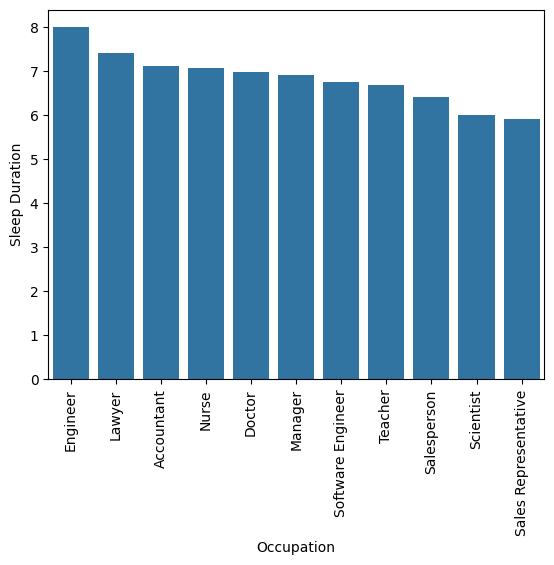

In [19]:
sns.barplot(data=df, x="Occupation", y="Sleep Duration");
plt.xticks(rotation=90);


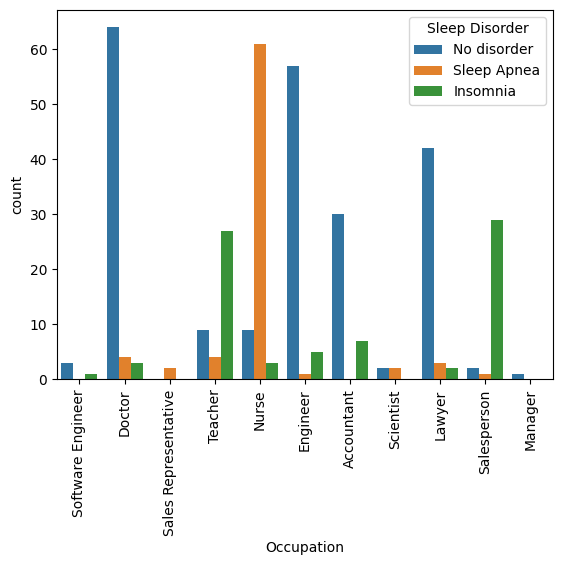

In [21]:
sns.countplot(data=sleep_data,x='Occupation',hue='Sleep Disorder');
plt.xticks(rotation=90);

According to the data, 
* nurses are more prone to Sleep Apnea. 
* teachers and salespeople usually suffer from insomnia 
* doctors, engineers, accountants and lawyers don't have any sleep disorders.

For my analysis, I will not prefer to keep this occupation column because:
* the data is not uniform/balanced for all types of classes
* the respective daily habits of these individuals are already available to us, which maybe a better reflective of their occupations and their choices, etc.

<Axes: xlabel='BMI Category', ylabel='Age'>

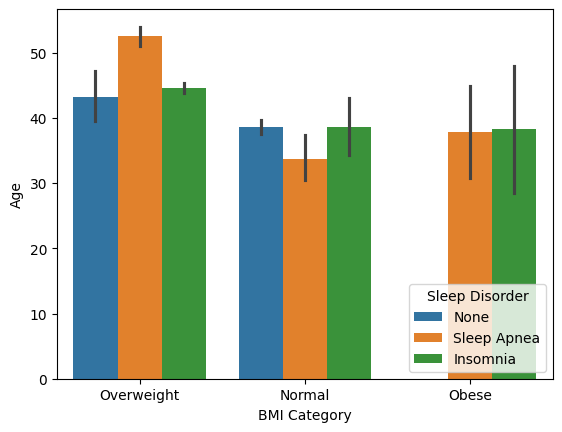

In [9]:
sns.barplot(data=sleep_data, x="BMI Category", y="Age", hue="Sleep Disorder")

Obese people are prone to having sleep disorders.

<Axes: xlabel='Age', ylabel='Sleep Duration'>

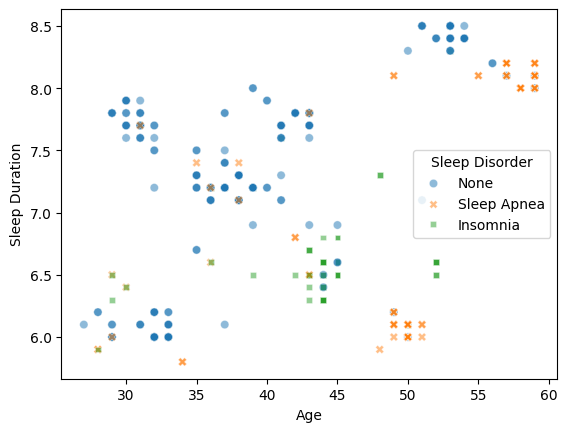

In [48]:
sns.scatterplot(data=sleep_data,y='Sleep Duration',x='Age',hue='Sleep Disorder',alpha=0.5,style='Sleep Disorder')

<Axes: xlabel='Quality of Sleep', ylabel='Sleep Duration'>

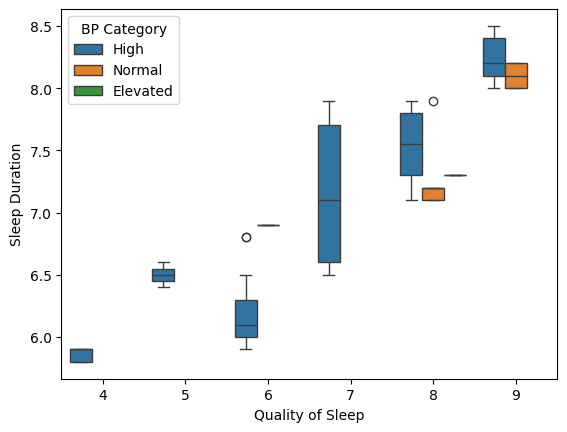

In [22]:
sns.boxplot(data=sleep_data,y='Sleep Duration',x='Quality of Sleep',hue='BP Category')

<Axes: xlabel='Sleep Disorder', ylabel='count'>

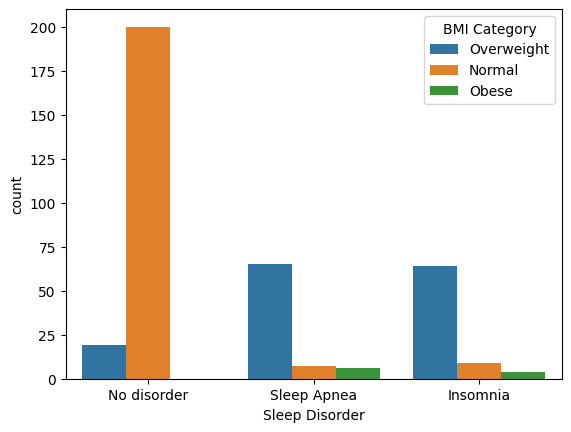

In [23]:
sns.countplot(data=sleep_data,x="Sleep Disorder",hue="BMI Category")

<Axes: xlabel='Physical Activity Level', ylabel='Density'>

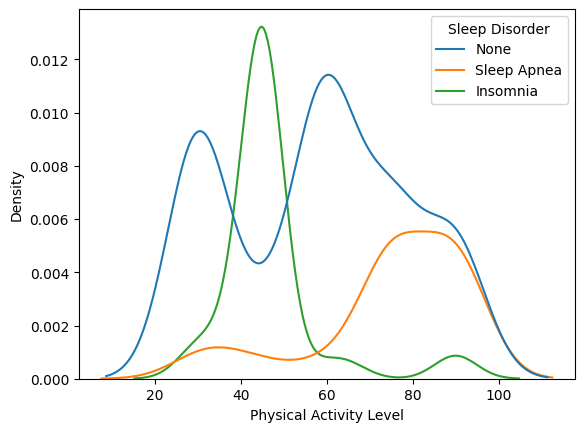

In [63]:
sns.kdeplot(data=sleep_data,x="Physical Activity Level",hue="Sleep Disorder")

In [44]:
sleep_data.drop('Person ID',axis=1).corr(numeric_only=True)

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,upper,lower
Age,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973,0.605878,0.593839
Sleep Duration,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533,-0.180406,-0.166570
Quality of Sleep,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791,-0.121632,-0.110151
Physical Activity Level,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723,0.265416,0.382651
Stress Level,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829,0.102818,0.091811
Heart Rate,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309,0.294143,0.271092
Daily Steps,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000,0.103342,0.241986
upper,0.605878,-0.180406,-0.121632,0.265416,0.102818,0.294143,0.103342,1.000000,0.972885
lower,0.593839,-0.166570,-0.110151,0.382651,0.091811,0.271092,0.241986,0.972885,1.000000


<Axes: >

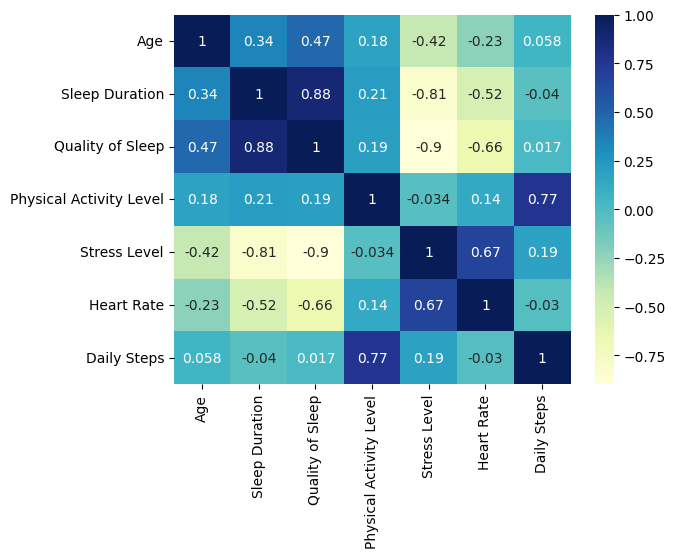

In [45]:
corr_data = sleep_data.drop(['Person ID','upper','lower'],axis=1)
sns.heatmap(corr_data.corr(numeric_only=True),cmap="YlGnBu",annot=True)

Let's convert our data into all-numeric before proceeding further for machine learning.

In [194]:
sleep_data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,upper,lower,BP Category
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No disorder,126,83,High
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No disorder,125,80,High
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No disorder,125,80,High
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,High
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,High


The columns that I can remove are: PErson id, Occupation, BP, upper and lower.

Our target column is 'sleep disorder'.

In [200]:
sleep_data_rev = sleep_data.drop(['Person ID','Occupation','Blood Pressure', 'upper', 'lower','Sleep Disorder'],axis=1)
sleep_data_rev.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,BP Category
0,Male,27,6.1,6,42,6,Overweight,77,4200,High
1,Male,28,6.2,6,60,8,Normal,75,10000,High
2,Male,28,6.2,6,60,8,Normal,75,10000,High
3,Male,28,5.9,4,30,8,Obese,85,3000,High
4,Male,28,5.9,4,30,8,Obese,85,3000,High


In [201]:
# one hot encoding 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

categorical_feat = ["Gender","BMI Category","BP Category"]
one_hot = OneHotEncoder().set_output(transform="default")

transformer = ColumnTransformer([("one_hot",one_hot,categorical_feat)],remainder="passthrough")

transformed_df = transformer.fit_transform(sleep_data_rev)

df_new = pd.DataFrame(transformed_df,columns=transformer.get_feature_names_out())
#df_new = pd.DataFrame(transformed_df)
df_new

,one_hot__Gender_Female,one_hot__Gender_Male,one_hot__BMI Category_Normal,one_hot__BMI Category_Obese,one_hot__BMI Category_Overweight,one_hot__BP Category_Elevated,one_hot__BP Category_High,one_hot__BP Category_Normal,remainder__Age,remainder__Sleep Duration,remainder__Quality of Sleep,remainder__Physical Activity Level,remainder__Stress Level,remainder__Heart Rate,remainder__Daily Steps
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,27.0,6.1,6.0,42.0,6.0,77.0,4200.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,28.0,6.2,6.0,60.0,8.0,75.0,10000.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,28.0,6.2,6.0,60.0,8.0,75.0,10000.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,28.0,5.9,4.0,30.0,8.0,85.0,3000.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,28.0,5.9,4.0,30.0,8.0,85.0,3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,59.0,8.1,9.0,75.0,3.0,68.0,7000.0
370,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,59.0,8.0,9.0,75.0,3.0,68.0,7000.0
371,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,59.0,8.1,9.0,75.0,3.0,68.0,7000.0
372,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,59.0,8.1,9.0,75.0,3.0,68.0,7000.0


In [202]:
# X and y split now 
from sklearn.model_selection import train_test_split

X = pd.DataFrame(transformed_df,columns=transformer.get_feature_names_out())
y = sleep_data["Sleep Disorder"]

In [203]:
# performing train and test split and 
# then scaling X features before performing ML modeling 
# since our target feature is unbalanced, we need to stratify our split and then the prediction should also be wighted.

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# train data split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101,stratify=y)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### models to work with!? 
1. Logistic Regression
2. KNN
3. SVC (Linear and RBF)
4. Ensemble - Random forest classifier

* I will first begin by estimating with all of them using their default hyperparameters.
* Then, based on scores, keep on tuning the hyperparameters using randomised search cv
* Later on perform grid search cv by using the best 1/2 models to check accuracy. 

In [29]:
# import all models 

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier 

In [30]:
#dictionary for models
#np.random.seed(101)

models = {"LR" : LogisticRegression(class_weight='balanced'), "KNN" : KNeighborsClassifier(), "SVC Linear": SVC(kernel='linear',class_weight='balanced'), 
          "SVC rbf": SVC(kernel='rbf',class_weight='balanced'), "RF" : RandomForestClassifier(class_weight='balanced')}

# a function to fit, train and score models
def fit_and_score(models,X_train, X_test,y_train,y_test):
    # need to set random seed 
    np.random.seed(101)
    
    #keep a dictionary to store the scores
    model_scores = {}

    # loop  through the models  
    for name, model in models.items():
        model.fit(X_train,y_train)

        # scoring the model
        model_scores[name] = model.score(X_test,y_test)

    return model_scores


In [31]:
model_Score = fit_and_score(models,scaled_X_train,scaled_X_test,y_train,y_test)
model_Score

{'LR': 0.9066666666666666,
 'KNN': 0.8933333333333333,
 'SVC Linear': 0.92,
 'SVC rbf': 0.9066666666666666,
 'RF': 0.9333333333333333}

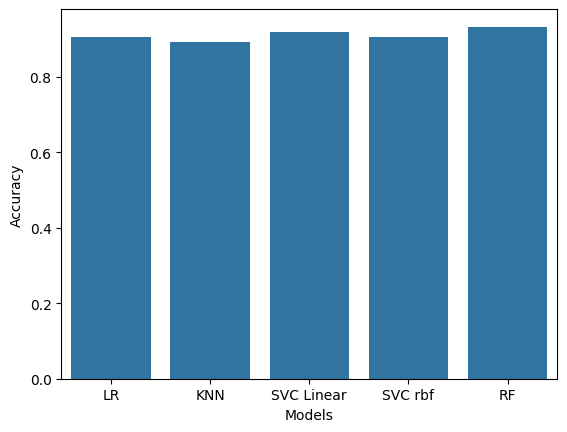

In [67]:
model_Scores_df = pd.DataFrame(data=model_Score.values(), index=model_Score.keys(),columns=["Accuracy"])
model_Scores_df
sns.barplot(data=model_Scores_df,x=model_Scores_df.index,y="Accuracy");
plt.xlabel("Models");

#### The models are highly accurate and among them linear svc and random forest model worked the best. 
Despite that, let us perform a randomizedsearchcv to improve our accuracy score.

The following models will be tested: 
* LR with l1/l2 penalty
* KNN
* SVC rbf
* RF

In [68]:
np.random.seed(101)

# now creating loop for our models for performing randomisedsearchCV 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

#dictionary for models
models = [("LR", LogisticRegression(class_weight='balanced')),
          ("KNN", KNeighborsClassifier()), 
          ("SVC Linear", SVC(kernel='linear',class_weight='balanced')), 
          ("SVC rbf", SVC(kernel='rbf',class_weight='balanced')), 
          ("Random Forest", RandomForestClassifier(class_weight='balanced'))
         ]

param_grids_RS = [ {"model__penalty": ['l1','l2'], "model__C": np.logspace(-4,4,20),
                    "model__solver":["liblinear","saga"]},
                 {"model__n_neighbors": np.arange(1,51)},
                 {"model__C": np.logspace(-4,4,20)},
                 {"model__C": np.logspace(-4,4,20), "model__gamma" : ["scale","auto"]}, 
                 {"model__n_estimators":np.arange(1,1000,50),
                 "model__max_depth":[None,3,5,7,10],
                 "model__min_samples_split":np.arange(2,20,2),
                 "model__min_samples_leaf":np.arange(1,20,2)}
                 ]

results = []

# a loop for all models and scores. 

for (name, model), param_grid in zip(models, param_grids_RS): 
    np.random.seed(101)

    pipe = Pipeline([('model', model)])
    
    RS = RandomizedSearchCV(pipe, param_grid, cv=5, n_iter=50, verbose=True) 
    RS.fit(scaled_X_train,y_train)
    best_params = RS.best_params_
    score_train = RS.score(scaled_X_train,y_train)
    test_score = RS.score(scaled_X_test,y_test)

    results.append({'Model': name, 'Best parameters': best_params, 'Train score': score_train, 'Test score': test_score})

results_df = pd.DataFrame(results)
results_df

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The ma

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits


,Model,Best parameters,Train score,Test score
0,LR,"{'model__solver': 'liblinear', 'model__penalty...",0.896321,0.920000
1,KNN,{'model__n_neighbors': 5},0.899666,0.893333
2,SVC Linear,{'model__C': 0.23357214690901212},0.882943,0.920000
3,SVC rbf,"{'model__gamma': 'scale', 'model__C': 11.28837...",0.926421,0.933333
4,Random Forest,"{'model__n_estimators': 451, 'model__min_sampl...",0.929766,0.933333


In [69]:
results_df

,Model,Best parameters,Train score,Test score
0,LR,"{'model__solver': 'liblinear', 'model__penalty...",0.896321,0.920000
1,KNN,{'model__n_neighbors': 5},0.899666,0.893333
2,SVC Linear,{'model__C': 0.23357214690901212},0.882943,0.920000
3,SVC rbf,"{'model__gamma': 'scale', 'model__C': 11.28837...",0.926421,0.933333
4,Random Forest,"{'model__n_estimators': 451, 'model__min_sampl...",0.929766,0.933333


In [70]:
results_df.to_csv("tuned_models.csv",index=False)

In [71]:
tuned_df = pd.read_csv("tuned_models.csv")
tuned_df

,Model,Best parameters,Train score,Test score
0,LR,"{'model__solver': 'liblinear', 'model__penalty...",0.896321,0.920000
1,KNN,{'model__n_neighbors': 5},0.899666,0.893333
2,SVC Linear,{'model__C': 0.23357214690901212},0.882943,0.920000
3,SVC rbf,"{'model__gamma': 'scale', 'model__C': 11.28837...",0.926421,0.933333
4,Random Forest,"{'model__n_estimators': 451, 'model__min_sampl...",0.929766,0.933333


In [72]:
model_Scores_df

,Accuracy
LR,0.906667
KNN,0.893333
SVC Linear,0.920000
SVC rbf,0.906667
RF,0.933333


Tuned SVC rbf and RF models are performing better than other models with the accuracy of 93%.

Before moving forward with a cross validated score determination, let us first visualise the feature importances.

#### Feature importance determined with tuned Logistic Regression model 

In [74]:
tuned_df['Best parameters'][0]

"{'model__solver': 'liblinear', 'model__penalty': 'l2', 'model__C': 206.913808111479}"

In [75]:
lr_model = LogisticRegression(solver='liblinear',penalty='l2',C=206.913808111479)
lr_model.fit(scaled_X_train,y_train)
lr_model.coef_[0]

array([-0.39621262,  0.39621262, -0.39644206,  0.22635912,  0.31798864,
       -0.07739087,  0.834787  , -0.83362229,  2.05114608, -0.45549671,
       -2.95673676,  0.62163093, -0.65539714, -1.62251276, -1.97041272])

In [76]:
coef_df = pd.DataFrame({'Coefficients':lr_model.coef_[0]},index=X.columns)
coef_df = coef_df.sort_values('Coefficients',ascending=True)
coef_df

,Coefficients
remainder__Quality of Sleep,-2.956737
remainder__Daily Steps,-1.970413
remainder__Heart Rate,-1.622513
one_hot__BP Category_Normal,-0.833622
remainder__Stress Level,-0.655397
remainder__Sleep Duration,-0.455497
one_hot__BMI Category_Normal,-0.396442
one_hot__Gender_Female,-0.396213
one_hot__BP Category_Elevated,-0.077391
one_hot__BMI Category_Obese,0.226359


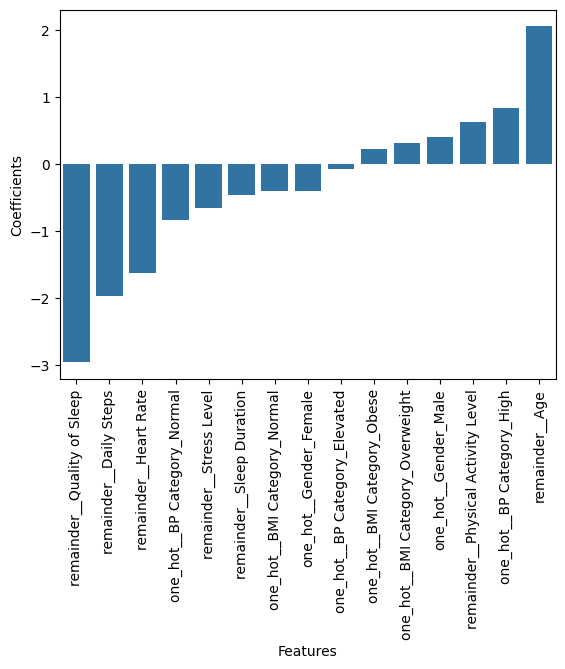

In [77]:
sns.barplot(data=coef_df,x=coef_df.index,y='Coefficients');
plt.xticks(rotation=90);
plt.xlabel('Features');

According to our tuned Logistic Regression model, 
* features that directly affect presence/absence of any sleep disorder are 
    * BMI categories of Obese and Overweight
    * Males
    * Physical activity level
    * high BP 
    * Age
* features that inversly affect presence/absence of any sleep disorder are
    * Quality of sleep
    * Daily steps 
    * Heart rate
    * normal BP
    * stress level 
    * sleep duration
    * normal BP 

#### Let us now determine the confusion matrices for these tuned models and then obtain the cross-validated scores for a better representation.
#### Confusion Matrices

In [80]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

#dictionary for models
models = [("LR", LogisticRegression(solver='liblinear', penalty='l2', C=206.913808111479)), 
          ("KNN", KNeighborsClassifier(n_neighbors=5)), 
          ("SVC Linear", SVC(kernel='linear', C=0.23357214690901212)), 
          ("SVC rbf", SVC(kernel='rbf',gamma='scale', C=11.288378916846883)), 
          ("Random Forest", RandomForestClassifier(n_estimators=451, min_samples_split=6, min_samples_leaf=1, max_depth=None))]

# a loop for all models to scores. 

def eval_metric(model, X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    a = print(classification_report(y_test,model.predict(X_test)))
    b = ConfusionMatrixDisplay.from_estimator(model,X_test,y_test);  

    return a,b


#### (a) Evaluations for tuned LR model

              precision    recall  f1-score   support

    Insomnia       0.92      0.73      0.81        15
 No disorder       0.93      0.98      0.96        44
 Sleep Apnea       0.88      0.94      0.91        16

    accuracy                           0.92        75
   macro avg       0.91      0.88      0.89        75
weighted avg       0.92      0.92      0.92        75



(None,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x16b80a6d0>)

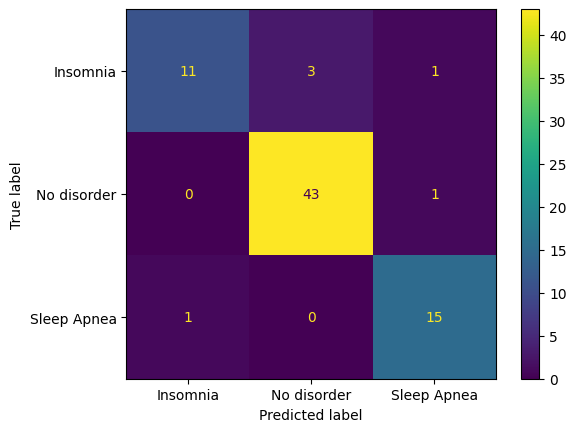

In [81]:
eval_metric(models[0][1],scaled_X_train,scaled_X_test,y_train,y_test)

#### (b) Evaluations for tuned KNN model

              precision    recall  f1-score   support

    Insomnia       0.85      0.73      0.79        15
 No disorder       0.90      0.98      0.93        44
 Sleep Apnea       0.93      0.81      0.87        16

    accuracy                           0.89        75
   macro avg       0.89      0.84      0.86        75
weighted avg       0.89      0.89      0.89        75



(None,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x16c026bd0>)

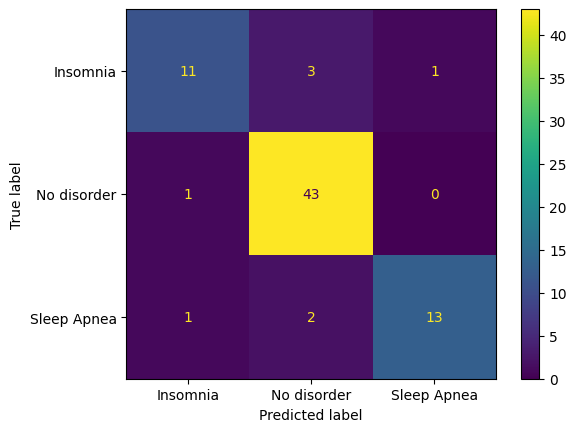

In [82]:
eval_metric(models[1][1],scaled_X_train,scaled_X_test,y_train,y_test)

#### (c) Evaluations for tuned SVC linear model

              precision    recall  f1-score   support

    Insomnia       0.92      0.73      0.81        15
 No disorder       0.93      0.98      0.96        44
 Sleep Apnea       0.88      0.94      0.91        16

    accuracy                           0.92        75
   macro avg       0.91      0.88      0.89        75
weighted avg       0.92      0.92      0.92        75



(None,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x16b947210>)

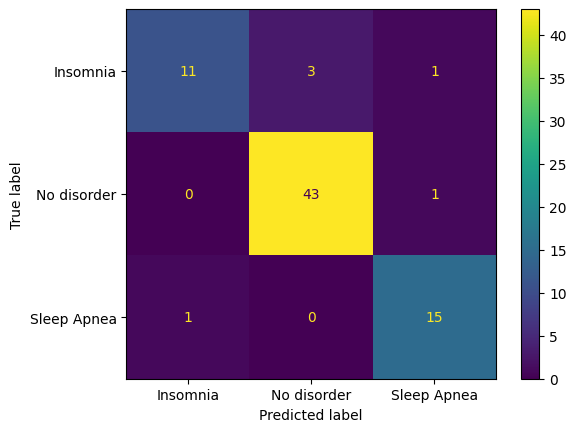

In [83]:
eval_metric(models[2][1],scaled_X_train,scaled_X_test,y_train,y_test)

#### (d) Tuned svc rbf model

              precision    recall  f1-score   support

    Insomnia       0.92      0.73      0.81        15
 No disorder       0.94      1.00      0.97        44
 Sleep Apnea       0.94      0.94      0.94        16

    accuracy                           0.93        75
   macro avg       0.93      0.89      0.91        75
weighted avg       0.93      0.93      0.93        75



(None,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x16947d910>)

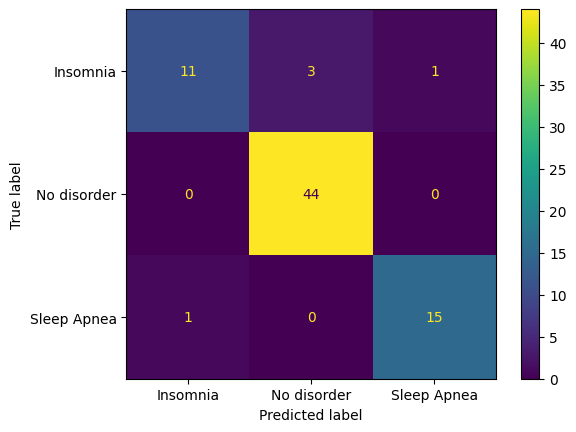

In [84]:
eval_metric(models[3][1],scaled_X_train,scaled_X_test,y_train,y_test)

#### (e) tuned random forest model 

              precision    recall  f1-score   support

    Insomnia       0.92      0.73      0.81        15
 No disorder       0.94      1.00      0.97        44
 Sleep Apnea       0.94      0.94      0.94        16

    accuracy                           0.93        75
   macro avg       0.93      0.89      0.91        75
weighted avg       0.93      0.93      0.93        75



(None,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x16c182b50>)

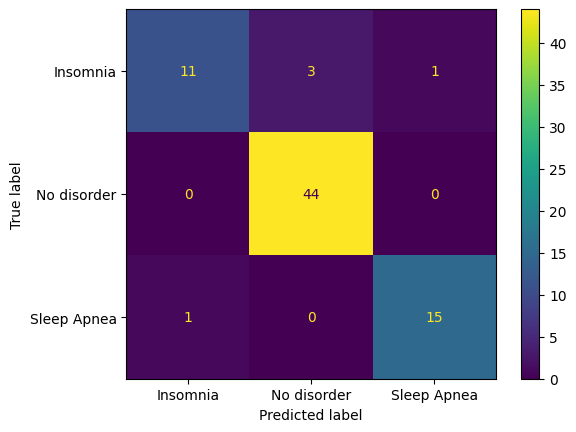

In [85]:
eval_metric(models[4][1],scaled_X_train,scaled_X_test,y_train,y_test)

In [86]:
# on the default parameters 
from sklearn.model_selection import cross_val_score

def cross_val_scores(model,X_train,X_test,y_train,y_test):
    np.random.seed(101)
    
    # fit the model first
    model.fit(X_train,y_train)
    
    # on validation test set 
    # i chose weighted accuracy since we have multiple classes for our target column 
    
    mean_cv_acc = np.mean(cross_val_score(model,X_test,y_test,cv=5,scoring="accuracy"))
    mean_cv_prec = np.mean(cross_val_score(model,X_test,y_test,cv=5,scoring="precision_weighted"))
    mean_cv_rec = np.mean(cross_val_score(model,X_test,y_test,cv=5,scoring="recall_weighted"))
    mean_cv_f1 = np.mean(cross_val_score(model,X_test,y_test,cv=5,scoring="f1_weighted"))
    
    
    #metrics_dict_val = {"Accuracy":mean_cv_acc,"Precision":mean_cv_prec,"Recall":mean_cv_rec,"F1-score":mean_cv_f1}
    result_vals = [mean_cv_acc,mean_cv_prec,mean_cv_rec,mean_cv_f1]
    
    return result_vals 

In [87]:
tuned_df['Best parameters'].tolist()

["{'model__solver': 'liblinear', 'model__penalty': 'l2', 'model__C': 206.913808111479}",
 "{'model__n_neighbors': 5}",
 "{'model__C': 0.23357214690901212}",
 "{'model__gamma': 'scale', 'model__C': 11.288378916846883}",
 "{'model__n_estimators': 451, 'model__min_samples_split': 6, 'model__min_samples_leaf': 1, 'model__max_depth': None}"]

In [88]:
np.random.seed(101)

#dictionary for models
models = [("LR", LogisticRegression(solver='liblinear', penalty='l2', C=206.913808111479)), 
          ("KNN", KNeighborsClassifier(n_neighbors=5)), 
          ("SVC Linear", SVC(kernel='linear', C=0.23357214690901212)), 
          ("SVC rbf", SVC(kernel='rbf',gamma='scale', C=11.288378916846883)), 
          ("Random Forest", RandomForestClassifier(n_estimators=451, min_samples_split=6, min_samples_leaf=1, max_depth=None))]

cv_results = []

# a loop for all models to scores. 

for name, model in models: 
    
    cvr = cross_val_scores(model,scaled_X_train,scaled_X_test,y_train,y_test)
    cv_results.append({'Model':name, "Accuracy":cvr[0], "Precision":cvr[1], "Recall": cvr[2], "F1 score": cvr[3]})

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.set_index("Model")
cv_results_df


,Model,Accuracy,Precision,Recall,F1 score
0,LR,0.853333,0.869148,0.853333,0.852346
1,KNN,0.853333,0.888000,0.853333,0.858646
2,SVC Linear,0.920000,0.930815,0.920000,0.917273
3,SVC rbf,0.920000,0.930815,0.920000,0.917273
4,Random Forest,0.906667,0.924815,0.906667,0.904987


In [109]:
#cv_tuned_results = 

cv_results_df.to_csv("tuned_cv_results.csv",index=False)

In [110]:
tuned_cvr = pd.read_csv("tuned_cv_results.csv")
tuned_cvr

,Model,Accuracy,Precision,Recall,F1 score
0,LR,0.853333,0.869148,0.853333,0.852346
1,KNN,0.853333,0.888000,0.853333,0.858646
2,SVC Linear,0.920000,0.930815,0.920000,0.917273
3,SVC rbf,0.920000,0.930815,0.920000,0.917273
4,Random Forest,0.906667,0.924815,0.906667,0.904987


#### Acoording to the above cross-validated results, the best performing model are the tuned SVC models.
Importantly, this model has 93% precision, which is important for our case since we are dealing with unbalanced data!


Let us now move forward to check if we can improve our results using ensemble based models such as:
* Adaboost
* gradient boost
* voting classifier
* stacking classifier 

1. AdaBoost

In [89]:
from sklearn.ensemble import AdaBoostClassifier 

np.random.seed(101)

# Create adaboost classifer object
clf_ab = AdaBoostClassifier(algorithm='SAMME') 

# Train Adaboost Classifer
clf_ab.fit(scaled_X_train, y_train)

clf_ab.score(scaled_X_test,y_test)

0.8933333333333333

Not that good of a score, let us try to find out the best number of estimators required for a better performance.

No of features available to us: 15
[0.7333333333333333, 0.7333333333333333, 0.6533333333333333, 0.88, 0.7866666666666666, 0.88, 0.8933333333333333, 0.88, 0.9066666666666666, 0.8933333333333333, 0.9066666666666666, 0.8933333333333333, 0.8933333333333333, 0.8933333333333333, 0.9066666666666666]
[0.2666666666666667, 0.2666666666666667, 0.3466666666666667, 0.12, 0.21333333333333337, 0.12, 0.10666666666666669, 0.12, 0.09333333333333338, 0.10666666666666669, 0.09333333333333338, 0.10666666666666669, 0.10666666666666669, 0.10666666666666669, 0.09333333333333338]


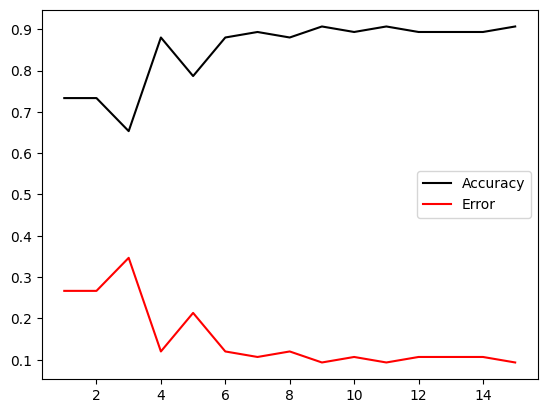

In [91]:
print("No of features available to us:", len(X_train.columns))

acc_results_ab = []
err_rates_ab = []

#np.random.seed(101)

for n in range(1,len(X_train.columns)+1): 
    np.random.seed(101)
    model = AdaBoostClassifier(n_estimators=n,algorithm="SAMME") 
    model.fit(scaled_X_train,y_train)
    acc_results_ab.append(model.score(scaled_X_test,y_test)) 
    err_rates_ab.append(1-model.score(scaled_X_test,y_test))

print(acc_results_ab)
print(err_rates_ab)

plt.plot(range(1,len(X_train.columns)+1),acc_results_ab,color='black')
plt.plot(range(1,len(X_train.columns)+1),err_rates_ab,color='red')
plt.legend(['Accuracy','Error'])
plt.show()

Although n=15 gives the best score of 90%, n=4 estimators are enough to give a close enough score of 88%.

Let us now work with n=4 to extract the most important features.

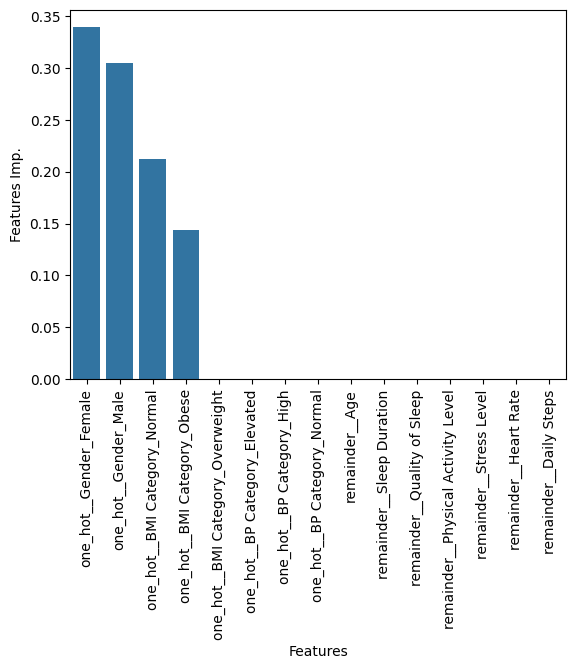

In [93]:
# working with the best classifier metric at N=4 to extract important features. 

model_ab = AdaBoostClassifier(n_estimators=4,algorithm="SAMME")
#model_ab.fit(scaled_X_train,y_train)

feats = pd.DataFrame(index=X.columns,data=model_ab.fit(scaled_X_train,y_train).feature_importances_,columns=['Features Imp.'])
sns.barplot(data=feats.sort_values("Features Imp.",ascending=False), x=feats.index,y='Features Imp.'); 
plt.xticks(rotation=90);
plt.xlabel("Features");

The most important 4 features are: the gender of the people and their bmi catgory of normal and obese!
Let us also check if these parameters change if we increase our n=15 that provided the maximum accuray of 90%.

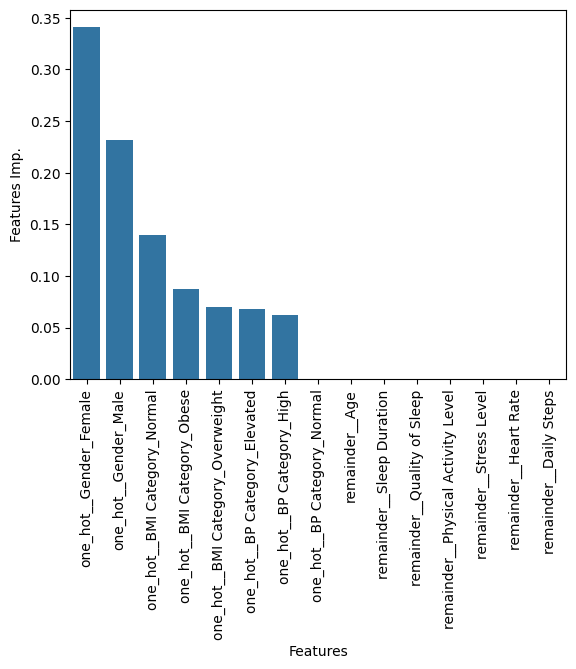

In [94]:
# working with the best classifier metric at N=15 to extract important features. 

model_ab = AdaBoostClassifier(n_estimators=15,algorithm="SAMME")
#model_ab.fit(scaled_X_train,y_train)

feats = pd.DataFrame(index=X.columns,data=model_ab.fit(scaled_X_train,y_train).feature_importances_,columns=['Features Imp.'])
sns.barplot(data=feats.sort_values("Features Imp.",ascending=False), x=feats.index,y='Features Imp.'); 
plt.xticks(rotation=90);
plt.xlabel("Features");

Apart from the 4 features found important with n=4, additional features that also make a difference are: BMI overweight category and the BPs.
Let us also determine the cross-validated scores for AdaBoost as well.

In [104]:
np.random.seed(101)

clf_ab = AdaBoostClassifier(n_estimators=15,algorithm="SAMME")

# a loop for all models to scores. 

cvr = cross_val_scores(clf_ab,scaled_X_train,scaled_X_test,y_train,y_test)
ab_results = {"Accuracy":cvr[0], "Precision":cvr[1], "Recall": cvr[2], "F1 score": cvr[3]}
print(ab_results)
ab_results_df = pd.DataFrame(data=ab_results.values(),index=ab_results.keys(),columns=["Scores"])
ab_results_df

{'Accuracy': 0.8799999999999999, 'Precision': 0.8988148148148147, 'Recall': 0.8799999999999999, 'F1 score': 0.8754987468671679}


,Scores
Accuracy,0.880000
Precision,0.898815
Recall,0.880000
F1 score,0.875499


#### 2. Gradient Boosting classifier

In [99]:
from sklearn.ensemble import GradientBoostingClassifier

np.random.seed(101) 

# Create gradient boosting classifer object
gb_clf = GradientBoostingClassifier()

# Train GB Classifer
gb_clf.fit(scaled_X_train, y_train)

#Predict the response for test dataset
#y_pred_val = model.predict(scaled_X_val)

gb_clf.score(scaled_X_test,y_test)

0.9333333333333333

Impressive accuracy of 93% with default parameters. Let's try and tune the hyperparamters using RandomizedSearchCV.

In [100]:
#from sklearn.model_selection import RandomizedSearchCV
np.random.seed(101)

param_grid_gb = param_grid = {'n_estimators': np.arange(1,500,50),
    'learning_rate': np.logspace(-4,4,20),
    'max_depth': np.arange(1,10)}

rs_gb_clf = RandomizedSearchCV(gb_clf, param_grid_gb, cv=5, n_iter=50, verbose=True)

rs_gb_clf.fit(scaled_X_train,y_train)
rs_gb_clf.score(scaled_X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


0.9297658862876255

In [101]:
rs_gb_clf.best_params_

{'n_estimators': 301, 'max_depth': 4, 'learning_rate': 0.23357214690901212}

Score has not improved much. But still, let us also perform a cross-validated evaluation with the default model.

In [106]:
np.random.seed(101)

clf_gb = GradientBoostingClassifier()

# a loop for all models to scores. 

cvr = cross_val_scores(clf_gb,scaled_X_train,scaled_X_test,y_train,y_test)
gb_results = {"Accuracy":cvr[0], "Precision":cvr[1], "Recall": cvr[2], "F1 score": cvr[3]}
print(gb_results)
gb_results_df = pd.DataFrame(data=gb_results.values(),index=gb_results.keys(),columns=["Scores"])
gb_results_df

{'Accuracy': 0.8400000000000001, 'Precision': 0.8848484848484848, 'Recall': 0.8400000000000001, 'F1 score': 0.8307523711238881}


,Scores
Accuracy,0.840000
Precision,0.884848
Recall,0.840000
F1 score,0.830752


CV score of AdaBoost was much better than the Gradient boosting classifier.

#### 3. Stacking classifier

In [111]:
tuned_cvr

,Model,Accuracy,Precision,Recall,F1 score
0,LR,0.853333,0.869148,0.853333,0.852346
1,KNN,0.853333,0.888000,0.853333,0.858646
2,SVC Linear,0.920000,0.930815,0.920000,0.917273
3,SVC rbf,0.920000,0.930815,0.920000,0.917273
4,Random Forest,0.906667,0.924815,0.906667,0.904987


In [204]:
# we will work with our tuned hyperparameter base models that were defined before. 

models = [("LR", LogisticRegression(solver='liblinear', penalty='l2', C=206.913808111479)), 
          ("KNN", KNeighborsClassifier(n_neighbors=5)), 
          ("SVC Linear", SVC(kernel='linear', C=0.23357214690901212)), 
          ("SVC rbf", SVC(kernel='rbf',gamma='scale', C=11.288378916846883)), 
          ("Random Forest", RandomForestClassifier(n_estimators=451, min_samples_split=6, min_samples_leaf=1, max_depth=None))]

from sklearn.ensemble import StackingClassifier

np.random.seed(101) 

SC = StackingClassifier( estimators= [ ('SVC linear',models[2][1]), ('RF',models[4][1] ) ], final_estimator= models[3][1] )

SC.fit(scaled_X_train,y_train)
SC.score(scaled_X_test,y_test)

0.9333333333333333

In [122]:
# cross validated metrics determination 

np.random.seed(101)

clf_sc = StackingClassifier( estimators= [ ('SVC linear',models[2][1]), ('RF',models[4][1] ) ], final_estimator= models[3][1] )

cvr = cross_val_scores(clf_sc,scaled_X_train,scaled_X_test,y_train,y_test)
sc_results = {"Accuracy":cvr[0], "Precision":cvr[1], "Recall": cvr[2], "F1 score": cvr[3]}
print(sc_results)
sc_results_df = pd.DataFrame(data=sc_results.values(),index=sc_results.keys(),columns=["Scores"])
sc_results_df

{'Accuracy': 0.9333333333333333, 'Precision': 0.9308148148148148, 'Recall': 0.9199999999999999, 'F1 score': 0.9306065162907269}


,Scores
Accuracy,0.933333
Precision,0.930815
Recall,0.920000
F1 score,0.930607


Results are very good compared to the adaboost and gradient boost classifiers as well as all other base models that we tried!
Finally, let us also check the voting classifier.
#### 4. Voting classifier

In [117]:
from sklearn.ensemble import VotingClassifier 

np.random.seed(101)

VC = VotingClassifier( estimators= [ ('SVC linear',models[2][1]), ('SVC rbf',models[3][1]), ('RF',models[4][1] ) ], voting='hard' )

VC.fit(scaled_X_train,y_train)
VC.score(scaled_X_test,y_test)

0.9333333333333333

In [118]:
# cross validated metrics determination 

np.random.seed(101)

clf_vc = VotingClassifier( estimators= [ ('SVC linear',models[2][1]), ('SVC rbf',models[3][1]), ('RF',models[4][1] ) ], voting='hard' )

cvr = cross_val_scores(clf_vc,scaled_X_train,scaled_X_test,y_train,y_test)
vc_results = {"Accuracy":cvr[0], "Precision":cvr[1], "Recall": cvr[2], "F1 score": cvr[3]}
print(vc_results)
vc_results_df = pd.DataFrame(data=vc_results.values(),index=vc_results.keys(),columns=["Scores"])
vc_results_df

{'Accuracy': 0.9199999999999999, 'Precision': 0.9308148148148148, 'Recall': 0.9199999999999999, 'F1 score': 0.9172731829573936}


,Scores
Accuracy,0.920000
Precision,0.930815
Recall,0.920000
F1 score,0.917273


In [7]:
# a table to compare the scores of the ensemble models
ab = {'Accuracy': 0.8799999999999999, 'Precision': 0.8988148148148147, 'Recall': 0.8799999999999999, 'F1 score': 0.8754987468671679}
gb = {'Accuracy': 0.8400000000000001, 'Precision': 0.8848484848484848, 'Recall': 0.8400000000000001, 'F1 score': 0.8307523711238881}
sc = {'Accuracy': 0.9333333333333333, 'Precision': 0.9308148148148148, 'Recall': 0.9199999999999999, 'F1 score': 0.9306065162907269}
vc = {'Accuracy': 0.9199999999999999, 'Precision': 0.9308148148148148, 'Recall': 0.9199999999999999, 'F1 score': 0.9172731829573936}

mydicts = [ab,gb,sc,vc]
df = pd.concat([pd.Series(d) for d in mydicts], axis=1)
df.columns = ["AdaBoost", "Gradient Boosting", "Stacking Classifier", "Voting Classifier"]
df.to_csv("ensemble_cv_scores.csv",index=False)

In [3]:
ensemble_cvs = pd.read_csv("ensemble_cv_scores.csv")
ensemble_cvs

,AdaBoost,Gradient Boosting,Stacking Classifier,Voting Classifier
0,0.880000,0.840000,0.933333,0.920000
1,0.898815,0.884848,0.930815,0.930815
2,0.880000,0.840000,0.920000,0.920000
3,0.875499,0.830752,0.930607,0.917273


### Altogether, I find the best model is the tuned Stacking classifier! It gave good results even with the cross-validation.

Let us now prepare a final model, save it with joblib, and then load it for final evaluation.

In [208]:
# necessary imports 
import numpy as np
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# final model which was the stacking classfier 
from sklearn.ensemble import StackingClassifier

np.random.seed(101)

# our data 

data_df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
data_df["Sleep Disorder"] = data_df["Sleep Disorder"].fillna("No disorder")
sleep_data['BMI Category'] = sleep_data['BMI Category'].replace('Normal Weight','Normal')

data_df[['upper','lower']] = data_df['Blood Pressure'].str.split('/',expand=True)
data_df[['upper','lower']] = data_df[['upper','lower']].astype(int)

def bld_press(upp,low):
    if ((upp < 90) & (low < 60)):
        return 'Low'
    elif ((upp < 120) & (low < 80)):
        return 'Normal'
    elif ((120 <= upp < 130) & (low < 80)):
        return 'Elevated'
    elif ((upp >= 130) or (low >= 80)):
        return 'High'
    
data_df['BP Category'] = np.vectorize(bld_press)(data_df['upper'],data_df['lower'])

# removing columns we don't need 
data_df_rev = data_df.drop(['Person ID','Occupation','Blood Pressure', 'upper', 'lower'],axis=1)

# X and y split
X = data_df_rev.drop("Sleep Disorder",axis=1)
y = data_df_rev["Sleep Disorder"]

# preprocessing 
# one hot encoding 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

cat_feat = ["Gender","BMI Category","BP Category"]
cat_transformer = OneHotEncoder().set_output(transform="default")

num_feat = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
num_transformer = StandardScaler()

preprocessor = ColumnTransformer(transformers=[("num",num_transformer,num_feat),
                                               ("cat", cat_transformer,cat_feat)])

#transformed_df = transformer.fit_transform(sleep_data_rev)

#df_new = pd.DataFrame(transformed_df,columns=transformer.get_feature_names_out())
#df_new = pd.DataFrame(transformed_df)
#df_new

models = [("LR", LogisticRegression(solver='liblinear', penalty='l2', C=206.913808111479,class_weight='balanced')), 
          ("KNN", KNeighborsClassifier(n_neighbors=5)), 
          ("SVC Linear", SVC(kernel='linear', C=0.23357214690901212,class_weight='balanced')), 
          ("SVC rbf", SVC(kernel='rbf',gamma='scale', C=11.288378916846883,class_weight='balanced')), 
          ("Random Forest", RandomForestClassifier(n_estimators=451, min_samples_split=6, min_samples_leaf=1, max_depth=None,class_weight='balanced'))]

final_clf = StackingClassifier( estimators= [ ('SVC linear',models[2][1]), ('RF',models[4][1] ) ], final_estimator= models[3][1] )

#final_clf.fit(scaled_X,y)

final_model = Pipeline(steps=[ ("preprocessor",preprocessor), ("model",final_clf)])

# train data split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101,stratify=y)

final_model.fit(X,y)
#final_model.score(X_test,y_test)


joblib.dump(final_model,'final_clf_model.pkl')

['final_clf_model.pkl']

In [143]:
# need to store the column names of the scaled X data 
joblib.dump(list(X.columns),"scaled_col_names.pkl")
joblib.dump(list(sleep_data.columns[:-1]),"original_col_names.pkl")

['original_col_names.pkl']

Let's predict for two hypothetical cases with the info according to the original data set indices 2 and 3. 

In [10]:
sleep_data.iloc[2:4]

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [1]:
pred_data_1 = [1,'Male',28,'Sales rep',5.9,4,30,8,'Obese','140/90',85,3000]
pred_data_2 = [2,'Male',28,'Doctor',6.2,6,60,8,'Normal','125/80',75,10000]

If i am given a new set of data, First, I will need to convert it to a dataframe that resembles our original data. 
1. make df
2. determine the bp category and keep that
3. remove the columns that we don't need 
4. predict using our final model which was made through a pipeline

In [5]:
import joblib
import pandas as pd
import numpy as np

# loading our original set of columns as well as scaled+OHE columns needed for the model 
original_cols_lst = joblib.load('original_col_names.pkl')
scaled_cols = joblib.load('scaled_col_names.pkl')

# make a list of the input data 
data_lst = [pred_data_1,pred_data_2]
data_df = pd.DataFrame(data=data_lst,columns=original_cols_lst)

# make changes to the blood pressure column to determine bp categories 
# although, we need to keep in mind that this model has been trained on people with high and normal bp

data_df[['upper','lower']] = data_df['Blood Pressure'].str.split('/',expand=True)
data_df[['upper','lower']] = data_df[['upper','lower']].astype(int)

def bld_press(upp,low):
    if ((upp < 90) & (low < 60)):
        return 'Low'
    elif ((upp < 120) & (low < 80)):
        return 'Normal'
    elif ((120 <= upp < 130) & (low < 80)):
        return 'Elevated'
    elif ((upp >= 130) or (low >= 80)):
        return 'High'
    
data_df['BP Category'] = np.vectorize(bld_press)(data_df['upper'],data_df['lower'])

# removing columns we don't need 
data_df_rev = data_df.drop(['Person ID','Occupation','Blood Pressure', 'upper', 'lower'],axis=1)

# loading our model now and finally, predicting

new_cols = joblib.load('scaled_col_names.pkl')
loaded_model = joblib.load('final_clf_model.pkl')

loaded_model.predict(data_df_rev)

array(['Insomnia', 'No disorder'], dtype=object)